In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import missingno as msno

import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest


from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

In [2]:
df_survey = pd.read_csv('Surveydata_train.csv')

In [3]:
df_survey.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [4]:
#profile = ProfileReport(df_survey, title="Pandas Profiling Report")

In [5]:
df_travel = pd.read_csv('Traveldata_train.csv')
df_travel.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


## Merging DataFrame

In [6]:
df=pd.merge(df_travel, df_survey, on='ID')
df.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,...,need improvement,good,excellent,good,good,good,good,good,good,good


In [7]:
df.isnull().sum()

ID                            0
Gender                       77
CustomerType               8951
Age                          33
TypeTravel                 9226
Travel_Class                  0
Travel_Distance               0
DepartureDelay_in_Mins       57
ArrivalDelay_in_Mins        357
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

# Fill Null Values

In [8]:
df_02 = df.copy()
df_02

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,...,need improvement,good,excellent,good,good,good,good,good,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0,0,...,poor,poor,poor,poor,good,good,good,need improvement,good,poor
94375,98894376,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0,1,...,need improvement,excellent,excellent,acceptable,acceptable,acceptable,acceptable,good,acceptable,good
94376,98894377,Male,NaN,63.0,Business travel,Business,2794,0.0,0.0,1,...,good,excellent,good,good,good,good,good,acceptable,good,acceptable
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,good,need improvement,good,good,acceptable,good,good,good,excellent,good


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   CustomerType             85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   TypeTravel               85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   DepartureDelay_in_Mins   94322 non-null  float64
 8   ArrivalDelay_in_Mins     94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_time_convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_location     

In [10]:
df

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,...,need improvement,good,excellent,good,good,good,good,good,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0,0,...,poor,poor,poor,poor,good,good,good,need improvement,good,poor
94375,98894376,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0,1,...,need improvement,excellent,excellent,acceptable,acceptable,acceptable,acceptable,good,acceptable,good
94376,98894377,Male,NaN,63.0,Business travel,Business,2794,0.0,0.0,1,...,good,excellent,good,good,good,good,good,acceptable,good,acceptable
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,good,need improvement,good,good,acceptable,good,good,good,excellent,good


In [11]:
df_02 = df.copy()
for col in df_02:
    df_02[col] = df_02[col].fillna(df_02[col].mode()[0])

In [12]:
df_02[col].mode()[0]

'good'

In [13]:
col2= ['Travel_Distance','DepartureDelay_in_Mins','ArrivalDelay_in_Mins']

In [14]:
df_02

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,Female,Loyal Customer,52.0,Business travel,Business,272,0.0,5.0,0,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,...,need improvement,good,excellent,good,good,good,good,good,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0,0,...,poor,poor,poor,poor,good,good,good,need improvement,good,poor
94375,98894376,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0,1,...,need improvement,excellent,excellent,acceptable,acceptable,acceptable,acceptable,good,acceptable,good
94376,98894377,Male,Loyal Customer,63.0,Business travel,Business,2794,0.0,0.0,1,...,good,excellent,good,good,good,good,good,acceptable,good,acceptable
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,good,need improvement,good,good,acceptable,good,good,good,excellent,good


In [15]:
df_02.isnull().sum()

ID                         0
Gender                     0
CustomerType               0
Age                        0
TypeTravel                 0
Travel_Class               0
Travel_Distance            0
DepartureDelay_in_Mins     0
ArrivalDelay_in_Mins       0
Overall_Experience         0
Seat_comfort               0
Seat_Class                 0
Arrival_time_convenient    0
Catering                   0
Platform_location          0
Onboardwifi_service        0
Onboard_entertainment      0
Online_support             0
Onlinebooking_Ease         0
Onboard_service            0
Leg_room                   0
Baggage_handling           0
Checkin_service            0
Cleanliness                0
Online_boarding            0
dtype: int64

In [16]:
for feature in df.columns: 
    if df[feature].dtype == 'object':
        print(df[feature].item)
        print( df[feature].unique())        

<bound method IndexOpsMixin.item of 0        Female
1          Male
2        Female
3        Female
4        Female
          ...  
94374      Male
94375      Male
94376      Male
94377      Male
94378      Male
Name: Gender, Length: 94379, dtype: object>
['Female' 'Male' nan]
<bound method IndexOpsMixin.item of 0        Loyal Customer
1        Loyal Customer
2        Loyal Customer
3        Loyal Customer
4        Loyal Customer
              ...      
94374    Loyal Customer
94375    Loyal Customer
94376               NaN
94377    Loyal Customer
94378    Loyal Customer
Name: CustomerType, Length: 94379, dtype: object>
['Loyal Customer' 'disloyal Customer' nan]
<bound method IndexOpsMixin.item of 0                    NaN
1        Personal Travel
2        Business travel
3        Business travel
4        Business travel
              ...       
94374    Business travel
94375    Business travel
94376    Business travel
94377    Personal Travel
94378                NaN
Name: TypeTravel, 

In [17]:
values = df['Travel_Class'].unique()
values

array(['Business', 'Eco'], dtype=object)

In [18]:
df['Travel_Class'] = df['Travel_Class'].map({
    'Business':1,
    'Eco':2
})

In [19]:
df['CustomerType'] = df['CustomerType'].map({
    'nan':'',
    'Loyal Customer':1,
    'disloyal Customer':2
})

In [20]:
df['TypeTravel'] = df['TypeTravel'].map({
    'nan':'',
    'Personal Travel':1,
    'Business travel':2
})

In [21]:
df['Gender'] = df['Gender'].map({
    'nan':'',
    'Female':1,
    'Male':2
})

In [22]:
df['Gender']

0        1
1        2
2        1
3        1
4        1
        ..
94374    2
94375    2
94376    2
94377    2
94378    2
Name: Gender, Length: 94379, dtype: object

for feature in df_survey.columns: 
    if df_survey[feature].dtype == 'object': 
        df_survey[feature] = pd.Categorical(df_survey[feature]).codes

In [28]:
df_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94379 non-null  object 
 2   CustomerType             94379 non-null  object 
 3   Age                      94379 non-null  float64
 4   TypeTravel               94379 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   DepartureDelay_in_Mins   94379 non-null  float64
 8   ArrivalDelay_in_Mins     94379 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_comfort             94379 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_time_convenient  94379 non-null  object 
 13  Catering                 94379 non-null  object 
 14  Platform_location     

## Encoding

In [29]:
map_values = {
    'nan':'',
    'extremely poor':1,  
     'poor':2,
    'good':3,
    'acceptable':4,
    'need improvement':5,
    'excellent':6,   
}

In [30]:
services = ['Seat_comfort', 'Arrival_time_convenient', 'Catering', 'Onboardwifi_service', 'Online_support',
           'Onlinebooking_Ease', 'Onboard_service', 'Leg_room', 'Baggage_handling', 'Checkin_service',
           'Cleanliness', 'Online_boarding', 'Onboard_entertainment']

In [31]:
for service in services:
    df_02[service] = df_02[service].map(map_values)

In [32]:
df_02.head(20)

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,Female,Loyal Customer,52.0,Business travel,Business,272,0.0,5.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,98800006,Male,Loyal Customer,44.0,Business travel,Business,2810,0.0,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,98800007,Male,Loyal Customer,56.0,Personal Travel,Eco,2029,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,98800008,Male,Loyal Customer,65.0,Personal Travel,Business,853,0.0,3.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,98800009,Male,Loyal Customer,22.0,Personal Travel,Eco,1636,1.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,98800010,Male,Loyal Customer,57.0,Business travel,Business,306,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_02['Seat_Class'] = df_02['Seat_Class'].map({
    'Green Car': 1,
    'Ordinary' : 0,
})

In [26]:
df_02['Platform_location'].unique()

array(['very convinient', 'need improvement', 'manageable',
       'Inconvinient', 'Convinient', 'very inconvinient'], dtype=object)

In [30]:
df_02['Platform_location'] = df_02['Platform_location'].map({
    'nan':'',
    'very inconvinient':1,
    'need improvement':3,
    'Inconvinient':2,   
    'manageable':4,     
    'Convinient':5, 
    'very convinient':6,
})

In [31]:
df_02.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,Female,Loyal Customer,52.0,Business travel,Business,272,0.0,5.0,0,...,3,5,4,5,5,4,5,3,5,2
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,3,2,3,3,6,5,2,5,3,3
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,...,5,3,6,6,6,6,6,3,6,6
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,...,4,5,4,4,4,4,4,3,4,4
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,...,5,3,6,3,3,3,3,3,3,3


In [29]:
df_02.tail()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
94374,98894375,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0,0,...,2,2,2,2,3,3,3,5,3,2
94375,98894376,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0,1,...,5,6,6,4,4,4,4,3,4,3
94376,98894377,Male,Loyal Customer,63.0,Business travel,Business,2794,0.0,0.0,1,...,3,6,3,3,3,3,3,4,3,4
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,3,5,3,3,4,3,3,3,6,3
94378,98894379,Male,Loyal Customer,54.0,Business travel,Eco,2107,28.0,28.0,0,...,4,4,4,4,2,3,3,2,3,4


<AxesSubplot:>

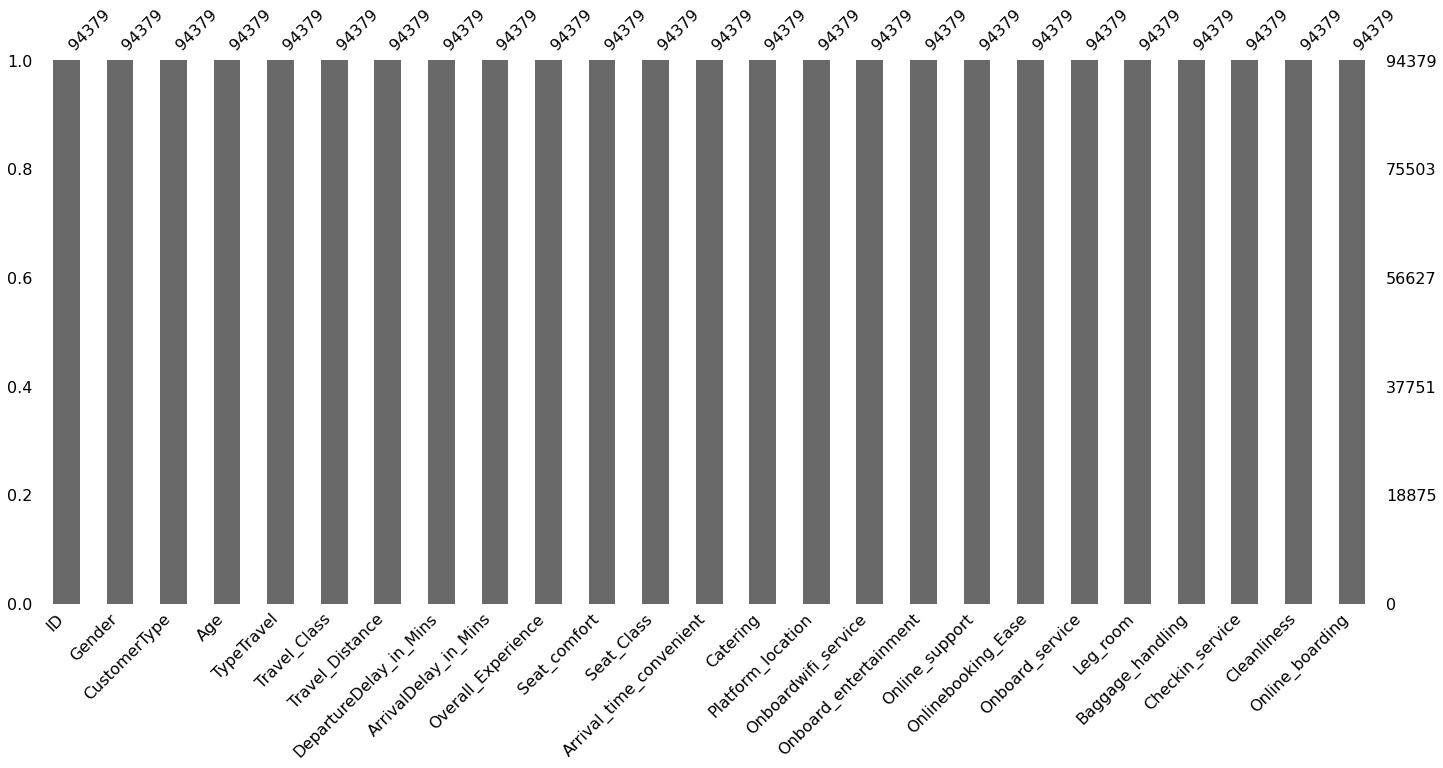

In [12]:
msno.bar(df_02)

In [13]:
df_02

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,Female,Loyal Customer,52.0,Business travel,Business,272,0.0,5.0,0,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,...,need improvement,good,excellent,good,good,good,good,good,good,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.0,Business travel,Business,1357,83.0,125.0,0,...,poor,poor,poor,poor,good,good,good,need improvement,good,poor
94375,98894376,Male,Loyal Customer,44.0,Business travel,Business,592,5.0,11.0,1,...,need improvement,excellent,excellent,acceptable,acceptable,acceptable,acceptable,good,acceptable,good
94376,98894377,Male,Loyal Customer,63.0,Business travel,Business,2794,0.0,0.0,1,...,good,excellent,good,good,good,good,good,acceptable,good,acceptable
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,good,need improvement,good,good,acceptable,good,good,good,excellent,good


In [14]:
df_02.set_index('ID', inplace=True)
df_02.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Overall_Experience,Seat_comfort,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,Business travel,Business,272,0.0,5.0,0,need improvement,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,poor,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,1,need improvement,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,0,acceptable,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,1,acceptable,...,need improvement,good,excellent,good,good,good,good,good,good,good


In [24]:
df_02.head()

,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins,Seat_comfort,Seat_Class,...,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
ID,,,,,,,,,,,,,,,,,,,,,
98800001,Female,Loyal Customer,52.0,Business travel,Business,272,0.0,5.0,need improvement,Green Car,...,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,poor,Ordinary,...,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0,need improvement,Green Car,...,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0,acceptable,Ordinary,...,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0,acceptable,Ordinary,...,need improvement,good,excellent,good,good,good,good,good,good,good


In [15]:
#df_01.dropna(inplace=True)

<AxesSubplot:>

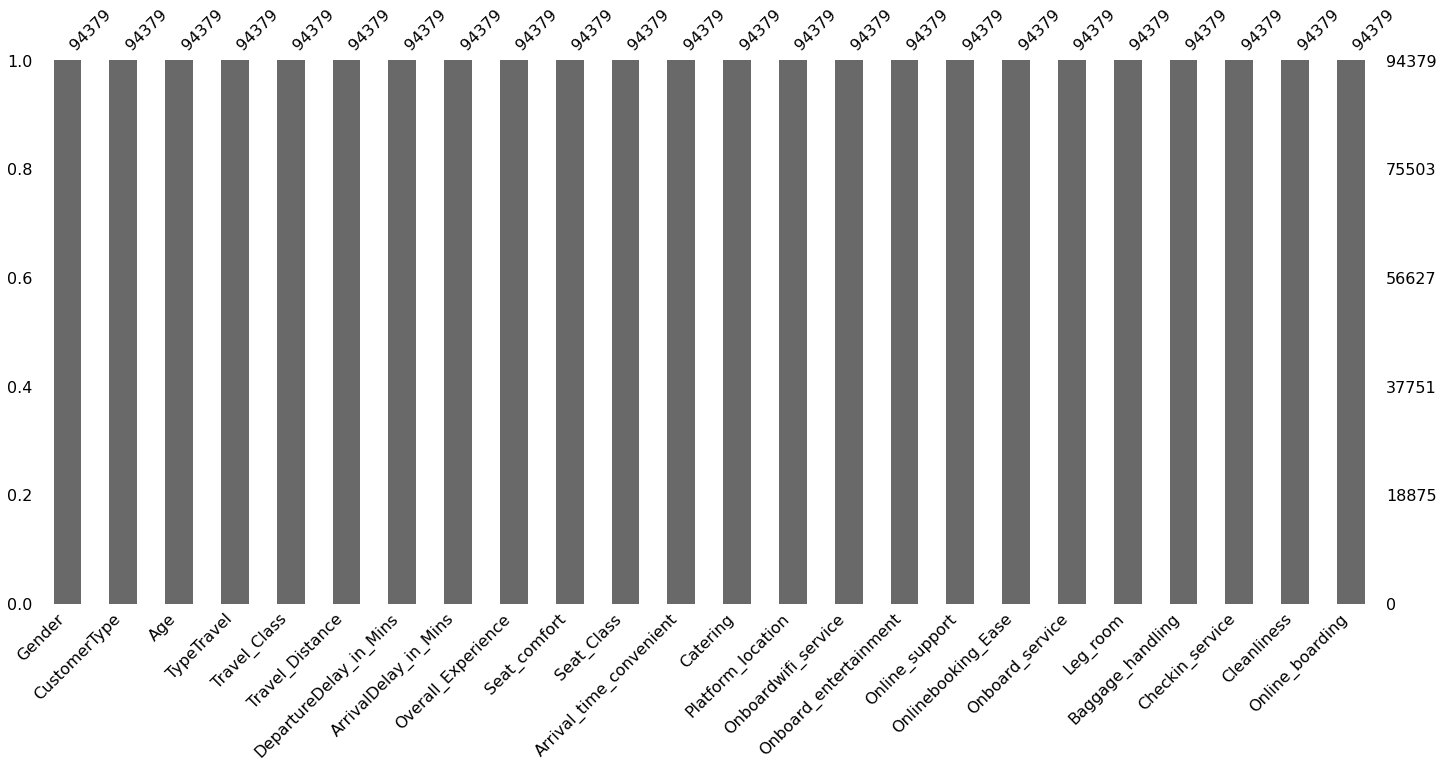

In [16]:
msno.bar(df_02)

In [17]:
y = df_02.pop('Overall_Experience')
x = df_02

In [18]:
y = np.array(y).reshape(-1,1)

In [19]:
x.shape

(94379, 23)

In [20]:
y.shape

(94379, 1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [22]:
print(x_train.shape)

(66065, 23)


## logistic Regression

In [23]:
log_model = LogisticRegression(random_state=0,max_iter=1000).fit(x_train, y_train)

ValueError: could not convert string to float: 'Female'

In [39]:
ytrain_predictlog = log_model.predict(x_train)
ytest_predictlog = log_model.predict(x_test)

In [40]:
model_score_log = log_model.score(x_test, y_test)
print('Accuracy Score is of Logistic ',model_score_log)

Accuracy Score is of Logistic  0.5445919164014174


## Random Forest 


In [41]:
random_state = [0,23,42]

for i in random_state:
    rfcl = RandomForestClassifier(random_state=i,oob_score = True)
    rfcl.fit(x_train, y_train)
    print(rfcl.oob_score_)

C:\Users\gayat\AppData\Local\Temp/ipykernel_19256/1009282415.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcl.fit(x_train, y_train)


0.9506074333367651


C:\Users\gayat\AppData\Local\Temp/ipykernel_19256/1009282415.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcl.fit(x_train, y_train)


0.9478276536600433


C:\Users\gayat\AppData\Local\Temp/ipykernel_19256/1009282415.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcl.fit(x_train, y_train)


0.9498867497168743


In [44]:
rfcl = RandomForestClassifier(n_estimators= 100, max_features =24, random_state =0)
rfcl.fit(x_train, y_train)

C:\Users\gayat\AppData\Local\Temp/ipykernel_19256/1216983047.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfcl.fit(x_train, y_train)


RandomForestClassifier(max_features=24, random_state=0)

In [45]:
rfcl.score(x_train,y_train)

1.0

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

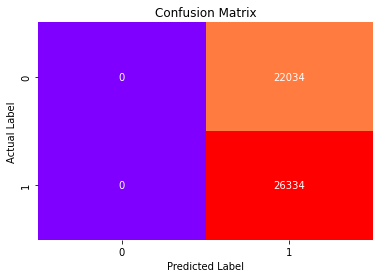

In [81]:
# Get the confusion matrix on the train data
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

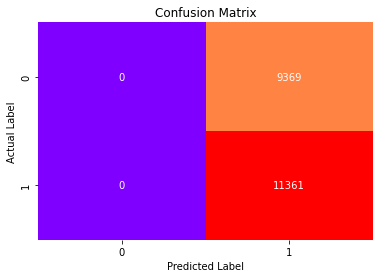

In [82]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

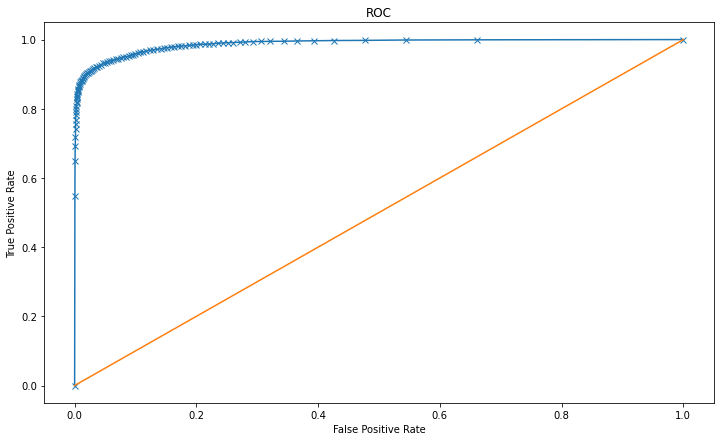

Area under Curve is 0.9873050859465529


In [84]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,rfcl.predict_proba(x_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,rfcl.predict_proba(x_test)[:,1]))

In [85]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [86]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [87]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                              Imp
ID                       0.050775
Seat_comfort             0.183476
Seat_Class               0.006704
Arrival_time_convenient  0.041596
Catering                 0.027337
Platform_location        0.028037
Onboardwifi_service      0.028899
Onboard_entertainment    0.399121
Online_support           0.018471
Onlinebooking_Ease       0.058024
Onboard_service          0.027913
Leg_room                 0.025903
Baggage_handling         0.021222
Checkin_service          0.023831
Cleanliness              0.023780
Online_boarding          0.034913


In [88]:
y_predict = dt_model.predict(x_test)

In [89]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [90]:
ytrain_predict = reg_dt_model.predict(x_train)
ytest_predict = reg_dt_model.predict(x_test)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     22034
           1       0.87      0.92      0.89     26334

    accuracy                           0.88     48368
   macro avg       0.88      0.87      0.88     48368
weighted avg       0.88      0.88      0.88     48368



In [93]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      9369
           1       0.86      0.91      0.89     11361

    accuracy                           0.87     20730
   macro avg       0.88      0.87      0.87     20730
weighted avg       0.87      0.87      0.87     20730

